# **BreastCancerDetection_VariousMLAlgorithm**

### *Importing Libraries*

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot
import matplotlib.pyplot as plt

### *Choose Dataset from Local Directory*

### *Load Dataset*

In [2]:
dataset = pd.read_csv('data.csv')

### *Summarize Dataset*

In [3]:
print(dataset.shape)
print(dataset.head(5))

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

### *Mapping Class String Values to Numbers*

In [4]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [5]:
X = dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
Y = dataset.iloc[:,1].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### *Splitting Dataset into Train & Test*

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### *Validating some ML algorithm by its accuracy - Model Score*

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [10]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.981285
LDA: 0.957863
KNN: 0.964839
CART: 0.929679
NB: 0.941417
SVM: 0.979014


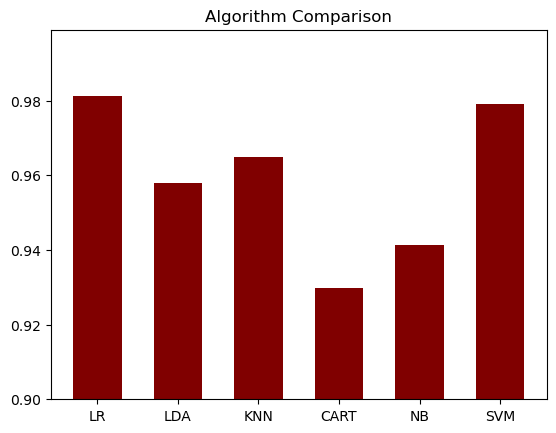

In [11]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

pyplot.ylim(.900, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

### *Training & Prediction using the algorithm with high accuracy*

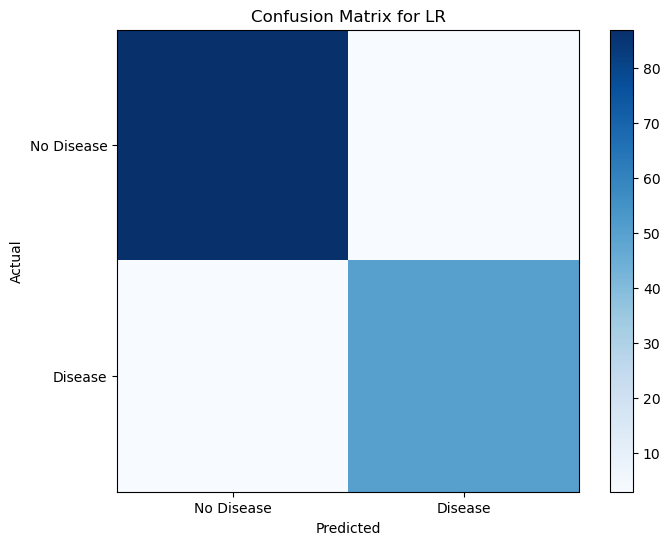

Confusion matrix for LR:
[[87  3]
 [ 3 50]]



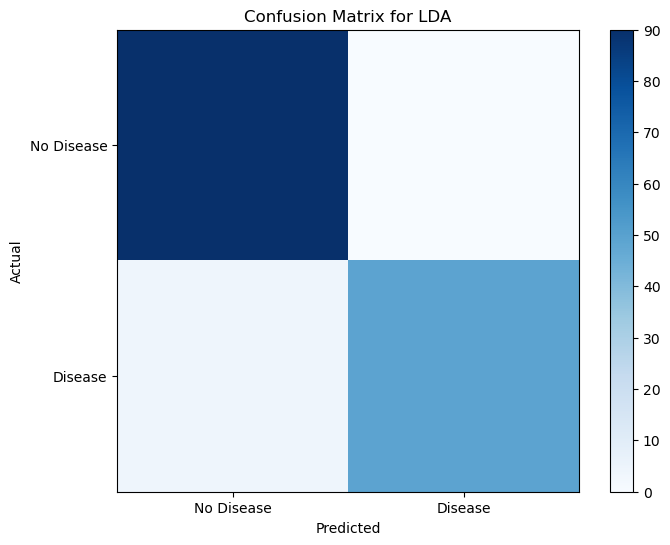

Confusion matrix for LDA:
[[90  0]
 [ 4 49]]



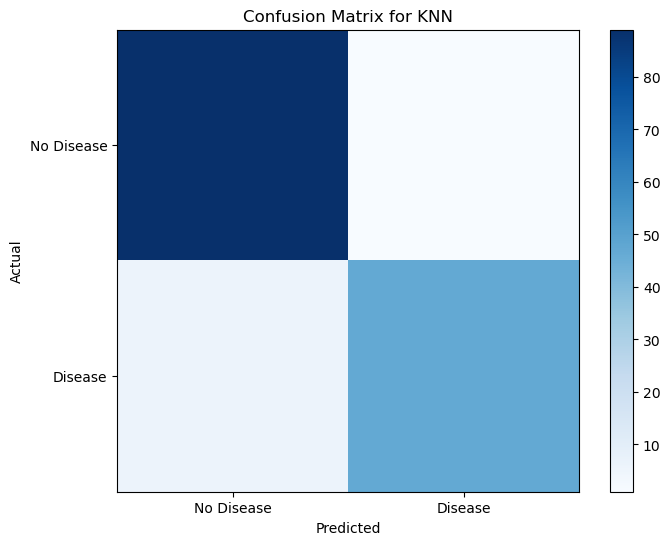

Confusion matrix for KNN:
[[89  1]
 [ 6 47]]



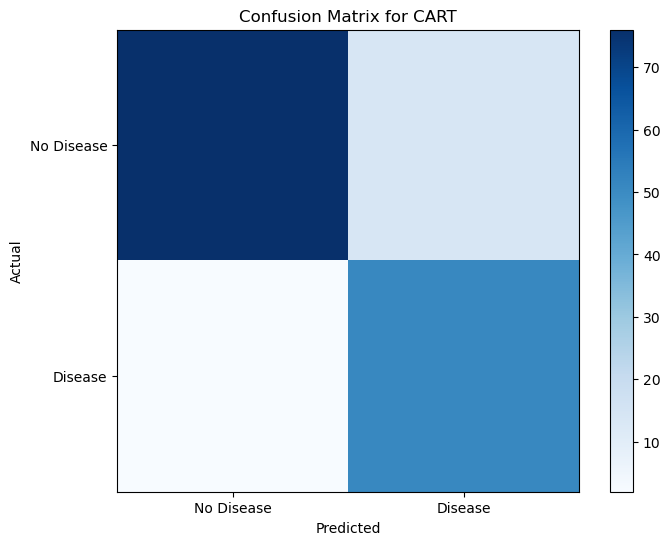

Confusion matrix for CART:
[[76 14]
 [ 2 51]]



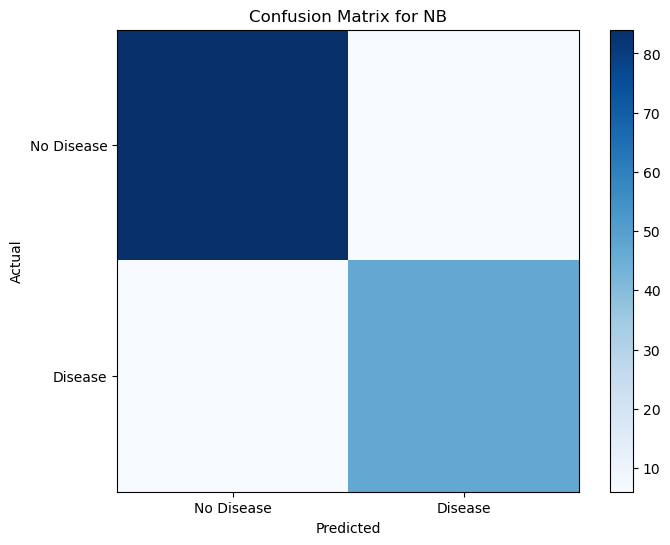

Confusion matrix for NB:
[[84  6]
 [ 6 47]]



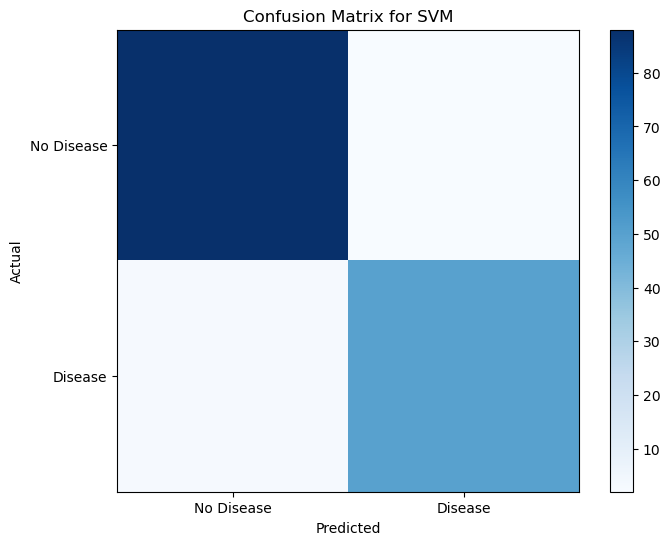

Confusion matrix for SVM:
[[88  2]
 [ 3 50]]



In [12]:
from sklearn.metrics import confusion_matrix

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    tick_marks = np.arange(2)  # Assuming target values are binary (0 or 1)
    plt.xticks(tick_marks, ['No Disease', 'Disease'])
    plt.yticks(tick_marks, ['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f'Confusion matrix for {name}:')
    print(cm)
    print()


LR: 0.981285
LDA: 0.957863
KNN: 0.964839
CART: 0.929623
NB: 0.941417
SVM: 0.979014


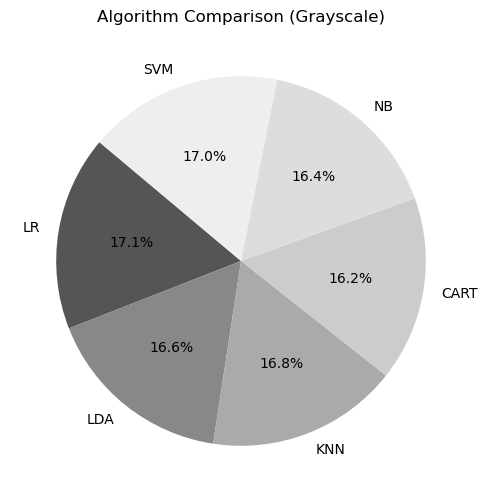

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

grayscale_colors = ['#555555', '#888888', '#aaaaaa', '#cccccc', '#dddddd', '#eeeeee']

pyplot.figure(figsize=(8, 6))
pyplot.pie(res, labels=names, colors=grayscale_colors, autopct='%1.1f%%', startangle=140)
pyplot.title('Algorithm Comparison (Grayscale)')
pyplot.show()

LR AUC: 0.981285
LDA AUC: 0.957863
KNN AUC: 0.964839
CART AUC: 0.929679
NB AUC: 0.941417
SVM AUC: 0.979014


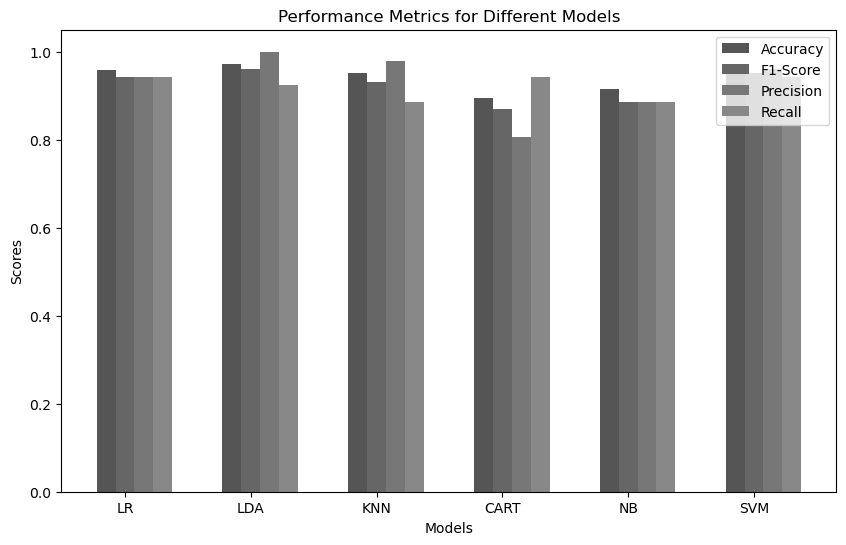

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


names = []
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

accuracy_color = '#555555'
f1_color = '#666666'
precision_color = '#777777'
recall_color = '#888888'

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)

    names.append(name)
    print('%s AUC: %f' % (name, cv_results.mean()))

    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)



bar_width = 0.15
index = np.arange(len(names))
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, accuracy_scores, bar_width, label='Accuracy', color=accuracy_color)
bar2 = ax.bar(index, f1_scores, bar_width, label='F1-Score', color=f1_color)
bar3 = ax.bar(index + bar_width, precision_scores, bar_width, label='Precision', color=precision_color)
bar4 = ax.bar(index + 2*bar_width, recall_scores, bar_width, label='Recall', color=recall_color)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(names)
ax.legend()

plt.show()

In [15]:
metrics_df = pd.DataFrame({
    'Model': names,
    'Accuracy': accuracy_scores,
    'F1-Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

# Display the table
print(metrics_df)

  Model  Accuracy  F1-Score  Precision    Recall
0    LR  0.958042  0.943396   0.943396  0.943396
1   LDA  0.972028  0.960784   1.000000  0.924528
2   KNN  0.951049  0.930693   0.979167  0.886792
3  CART  0.895105  0.869565   0.806452  0.943396
4    NB  0.916084  0.886792   0.886792  0.886792
5   SVM  0.965035  0.952381   0.961538  0.943396
